In [15]:
# Import the  Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the data
data=pd.read_csv('state_wise_data.csv')
# Data is taken from https://data.gov.in/

In [17]:
data.head()

,State,Gross_enroll_higher_sec_girls,Gross_enroll_higher_sec_total,Percent_schools_with_computer,Unemployment_Rate,Electricity,Drinking_water,Sanitation,Clean_Cooking_fuel,Iodized_Salt,Women_Literacy,Men_Literacy,Immunization,Knowledge_HIV_Women,Knowledge_HIV_Men,Tobacco_alcohol_women,Tobacco_alcohol_men
0,Andaman and Nicobar Islands,76.40,74.62,57.00,65,97.0,94.3,74.3,63.5,99.3,84.1,88.5,73.2,29.3,44.0,2.5,51.7
1,Andhra Pradesh,62.27,60.16,30.59,21,98.8,72.7,53.6,62.0,81.6,62.9,79.4,65.3,29.0,55.5,0.4,34.9
2,Arunachal Pradesh,61.60,61.81,24.36,21,88.7,87.5,61.3,45.0,99.3,65.6,84.5,38.2,16.0,27.4,26.3,59.0
3,Assam,39.47,38.81,10.76,47,78.2,83.8,47.7,25.1,99.6,71.8,82.8,47.1,9.4,22.4,6.9,35.6
4,Bihar,36.66,35.62,9.37,35,58.6,98.2,25.2,17.8,93.6,49.6,77.8,61.7,10.1,26.2,0.2,28.9


In [18]:
# View the data
# I have removed Telengana and Dadra and Nagar Haveli as it was incomplete
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 17 columns):
State                            34 non-null object
Gross_enroll_higher_sec_girls    34 non-null float64
Gross_enroll_higher_sec_total    34 non-null float64
Percent_schools_with_computer    34 non-null float64
Unemployment_Rate                34 non-null int64
Electricity                      34 non-null float64
Drinking_water                   34 non-null float64
Sanitation                       34 non-null float64
Clean_Cooking_fuel               34 non-null float64
Iodized_Salt                     34 non-null float64
Women_Literacy                   34 non-null float64
Men_Literacy                     34 non-null float64
Immunization                     34 non-null float64
Knowledge_HIV_Women              34 non-null float64
Knowledge_HIV_Men                34 non-null float64
Tobacco_alcohol_women            34 non-null float64
Tobacco_alcohol_men              34 non-null float64

In [19]:
#Create a copy of the data by removing the State Column
data_copy=data.iloc[:,1:]
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data_copy)

In [20]:
# Import Hierarchical Clustering Packages
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

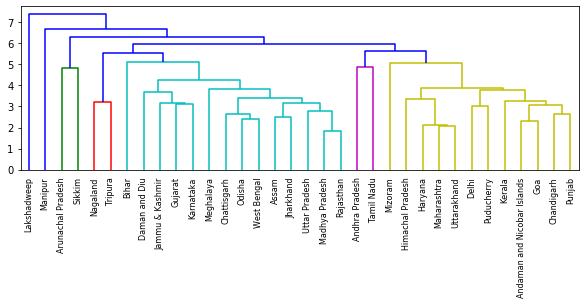

In [21]:
# for method parameter we can try :  single,complete,average,weighted,centroid,median
# For metric parameter  we can try :'braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, 
#‘cosine’, ‘dice’, ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’,
#‘matching’, ‘minkowski’, rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, 
#‘sqeuclidean’, ‘yule’.
plt.figure(figsize=(10,3))
mergings=linkage(data_scaled,method='average',metric='minkowski')
dendrogram(mergings, labels=tuple(data['State']),leaf_rotation=90)
plt.show()

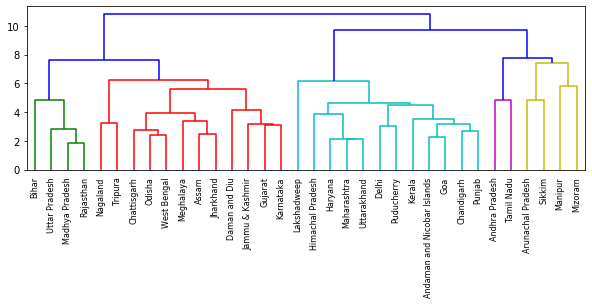

In [22]:
# Try with method='complete',metric='euclidean'
plt.figure(figsize=(10,3))
mergings=linkage(data_scaled,method='complete',metric='euclidean')
dendrogram(mergings, labels=tuple(data['State']),leaf_rotation=90)
plt.show()

<font
color= green><b>Of the various method & metric tried, method='complete',metric='euclidean' seems to be giving a better picture of the state grouping based on my understanding of state demography and dynamics </b></font>

In [23]:
# Cut the tree at 5 clusters
h_lables=cut_tree(mergings,n_clusters=5).reshape(-1,)
data['Cluster']=h_lables
data.Cluster=data.Cluster+1
data['Cluster'].value_counts()

4    12
1    12
5     4
3     4
2     2
Name: Cluster, dtype: int64

<font
color= green><b>Tried different cluster cuts and found 5 to be a logical optimum based on the distribution of the clusters</b></font>

In [24]:
cols=['Gross_enroll_higher_sec_girls',
       'Gross_enroll_higher_sec_total', 'Percent_schools_with_computer',
       'Unemployment_Rate', 'Electricity', 'Drinking_water', 'Sanitation',
       'Clean_Cooking_fuel', 'Iodized_Salt', 'Women_Literacy', 'Men_Literacy',
       'Immunization', 'Knowledge_HIV_Women', 'Knowledge_HIV_Men',
       'Tobacco_alcohol_women', 'Tobacco_alcohol_men']

In [25]:
dic={'Gross_enroll_higher_sec_girls':'Girls enrollment Higher Sec',
       'Gross_enroll_higher_sec_total':'Total Enrollment Higher Sec', 
     'Percent_schools_with_computer':'Computer Facility in schools',
       'Unemployment_Rate':'Unemployment Rate', 'Electricity':'Electricity at Home', \
     'Drinking_water':'Clean Drinking water at Home', 'Sanitation':'Basic Sanitation facilities at Home',
       'Clean_Cooking_fuel':'Clean Cooking Fuel', 'Iodized_Salt':'Usage of iodized Salt',\
       'Women_Literacy':'Women Literacy', 'Men_Literacy':'Men Literacy',
       'Immunization':'Immunisation', 'Knowledge_HIV_Women':'Knowledge Abount HIV :Women', \
      'Knowledge_HIV_Men':'Knowledge Abount HIV :Men',
       'Tobacco_alcohol_women':'Tobacco Alcochol Usgae :Women', 'Tobacco_alcohol_men':'Tobacco Alcochol Usgae :Men'}

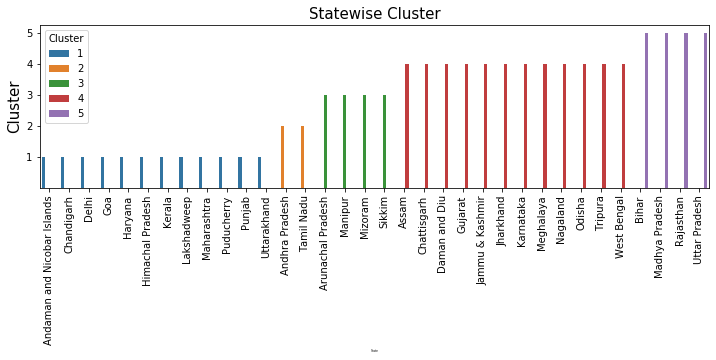

In [29]:
# Plot to see which States are grouped together
plt.figure(figsize=(12,3))
dataplot=sns.barplot(x='State',y='Cluster', data=data.sort_values(['Cluster','State']),hue='Cluster') 
plt.ylabel("Cluster", fontsize= 15)
plt.yticks(range(1,6))
plt.xlabel("State", fontsize= 3)
plt.title("Statewise Cluster", fontsize= 15)
plt.xticks(rotation='vertical')
plt.show()

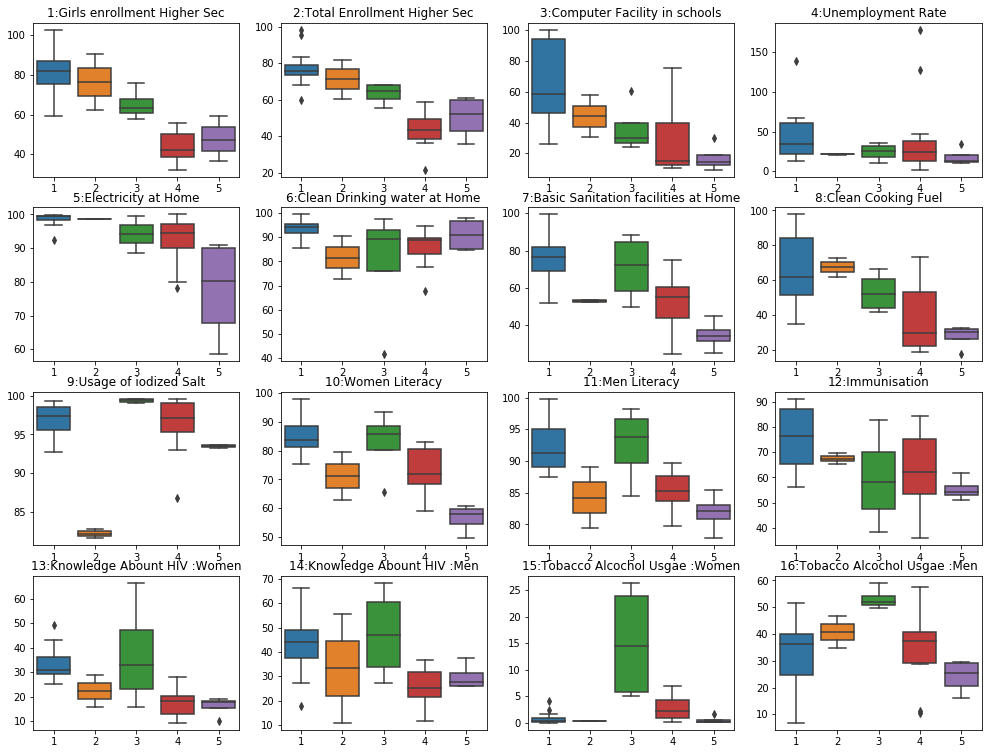

In [27]:
plt.figure(figsize=(17, 13))
k=1
l=0
for i in cols:
    l=l+1
    plt.subplot(4,4,k)
    plt.title(str(l)+':'+dic[i])
    g=sns.boxplot(x = 'Cluster', y = i, data = data)
    g.set(xlabel=None)
    g.set(ylabel=None)
    k=k+1
plt.show()